In [1]:
import matplotlib.pyplot as plt
import cv2

from sudokudetector.model import Model
from sudokudetector.image import split_cell, sudoku_detect

%matplotlib inline

In [2]:
_, result = sudoku_detect('dataset/image201.jpg')
cells = split_cell(result)

In [3]:
input_shape = (28, 28, 1)

model = Model(input_shape)
model.load_model('model.h5')

5 1 1 1 8 1 1 1 1 
1 9 1 1 7 1 1 2 1 
1 1 1 8 1 4 1 1 1 
1 1 8 1 1 1 7 1 1 
2 7 1 1 1 1 1 4 8 
1 1 2 1 1 1 8 1 1 
1 1 1 7 7 5 1 1 1 
1 4 1 1 1 6 1 7 6 
8 1 1 1 1 1 1 1 1 


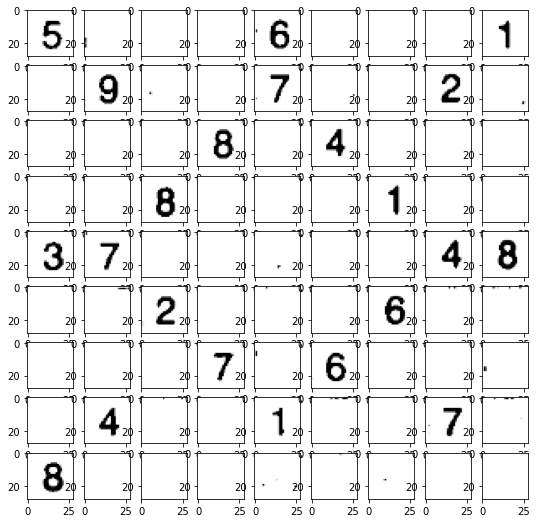

In [4]:
def resizing(image_cell):
    image_cell = cv2.resize(image_cell, (28, 28))
    image_cell = image_cell.reshape(28, 28, 1)
    return image_cell

# print(pred)

fig=plt.figure(figsize=(9, 9))

for i, cell in enumerate(cells):
    cell = resizing(cell)
    fig.add_subplot(9, 9, i + 1)
    plt.imshow(cell, cmap="Greys")
    pred = model.predict(cell)
    print(str(pred.argmax()) + ' ', end= '\n' if i%9 == 8 else '')

plt.show()